<a href="https://colab.research.google.com/github/KLeeDE/ResearchProj_UrbanHeat/blob/master/3D-CNN/2020_11_30_3DCNN_allpix_modelpred_testexamples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem: Although the model accuracy is over 90%, classification in the image is not clear 

Possible solutions: 
	1. Put more labels
	2. Put more number of images
  3. Put more test examples (Pick!)

<< Test examples>>

Split 0 to 100 image then stacking it together at the same 100 to 200 image, but still maintain 11 by 11 by 100. Hopefully, the result is same.(the first 100 images in the night and second 100 images in the night (101~200 image)). Then, treat it as different object. 

* Number of hand selected AC pixels are objects 

Now, next 100 to 200 images are objects, but time series are different time of features. But it can be treated as different objects. We are using the same pixels, but totally different objects from the different features. 

Given pixels, each pixels will have two different set of pixels. Those might result in the same or different classification.

Expection: 
* It will boost my training set size
* features have more avilability
* Now I have many neurons in my networks
* It aims to increase training examples with different time steps

# JPG images

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import imageio as iio
import matplotlib.pyplot as plt

# Test Example 1 

In [58]:
# -- set the file names
pname = "/content/drive/My Drive/urban_heat/output/paths_times.csv"
fpaths = pd.read_csv(pname)
fpaths = fpaths[(fpaths.time >= "2020-03-14 00:00:00") & 
                (fpaths.time < "2020-03-14 04:00:00")]
fpaths = fpaths.path.values

print("there are {0} files between midnight and 4am on 03/14/20" \
      .format(len(fpaths)))

# -- only take the first 100 images
fpaths_ex1 = fpaths[:100]

# -- read in the 0th image to get the image shape
img0 = np.asarray(iio.imread(fpaths_ex1[0]))[:, :, 0] / 255.
nrow, ncol = img0.shape

# -- initialize an array to hold all of the images
imgs_ex1 = np.zeros((len(fpaths_ex1), nrow, ncol))

# -- read in the images
for ii, fname in enumerate(fpaths_ex1):
  if ii % 20 == 0:
    print("working on the {0} image".format(ii))

  imgs_ex1[ii, :, :] = np.asarray(iio.imread(fname))[:, :, 0] / 255.

there are 1435 files between midnight and 4am on 03/14/20
working on the 0 image
working on the 20 image
working on the 40 image
working on the 60 image
working on the 80 image


In [54]:
imgs[ii, :, :].shape

(240, 320)

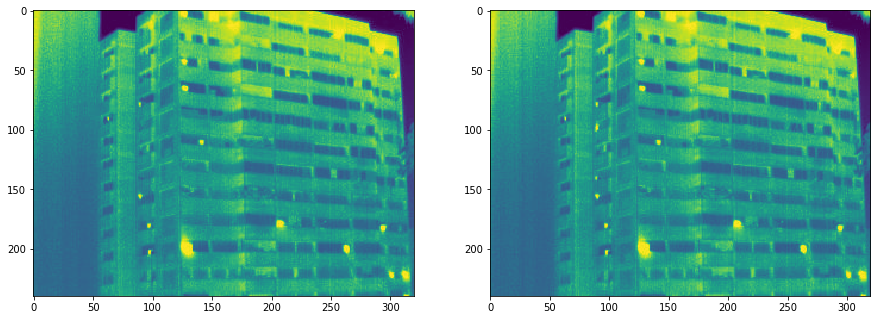

In [5]:
fig, ax = plt.subplots(1, 2, figsize=[15, 7])
ax[0].imshow(imgs[20], interpolation="nearest")
ax[1].imshow(imgs[40], interpolation="nearest")
fig.show()

#Test Example 2

In [59]:
# -- set the file names
pname = "/content/drive/My Drive/urban_heat/output/paths_times.csv"
fpaths = pd.read_csv(pname)
fpaths = fpaths[(fpaths.time >= "2020-03-14 00:00:00") & 
                (fpaths.time < "2020-03-14 04:00:00")]
fpaths = fpaths.path.values

print("there are {0} files between midnight and 4am on 03/14/20" \
      .format(len(fpaths)))

# -- only take the first 100 images
fpaths_ex2 = fpaths[:100]

# -- read in the 0th image to get the image shape
img0 = np.asarray(iio.imread(fpaths_ex2[0]))[:, :, 0] / 255.
nrow, ncol = img0.shape

# -- initialize an array to hold all of the images
imgs_ex2 = np.zeros((len(fpaths_ex2), nrow, ncol))

# -- read in the images
for ii, fname in enumerate(fpaths_ex2):
  if ii % 20 == 0:
    print("working on the {0} image".format(ii))

  imgs_ex2[ii, :, :] = np.asarray(iio.imread(fname))[:, :, 0] / 255.

there are 1435 files between midnight and 4am on 03/14/20
working on the 0 image
working on the 20 image
working on the 40 image
working on the 60 image
working on the 80 image


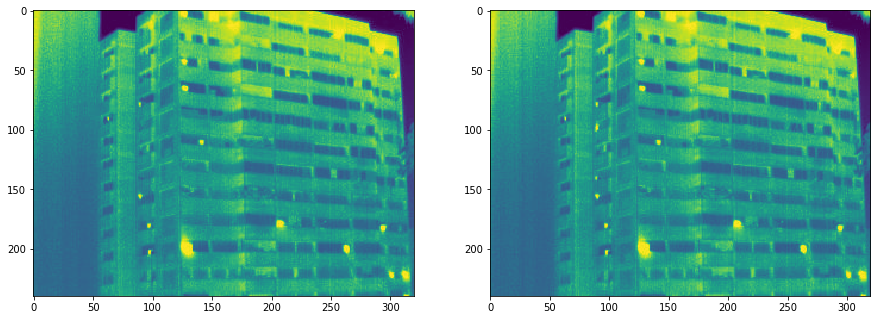

In [60]:
fig, ax = plt.subplots(1, 2, figsize=[15, 7])
ax[0].imshow(imgs_ex2[20], interpolation="nearest")
ax[1].imshow(imgs_ex2[40], interpolation="nearest")
fig.show()

# Label pixels

In [61]:
# -- read in the labeled pixels
acs = np.load("/content/drive/My Drive/urban_heat/output/acs_pix.npy")
bld = np.load("/content/drive/My Drive/urban_heat/output/bld_pix.npy")
#sky = np.load("/content/drive/My Drive/urban_heat/output/sky_pix.npy")
sky = np.load("/content/drive/My Drive/urban_heat/output/sky_pix_20201112.npy")
win = np.load("/content/drive/My Drive/urban_heat/output/win_pix.npy")

# -- convert to pixel numbers
acs_col, acs_row = acs.round().astype(int).T
bld_col, bld_row = bld.round().astype(int).T
sky_col, sky_row = sky.round().astype(int).T
win_col, win_row = win.round().astype(int).T

In [62]:
# -- extract features from images
feat_acs_ex1 = imgs_ex1[:, acs_row, acs_col].T
feat_bld_ex1 = imgs_ex1[:, bld_row, bld_col].T
feat_sky_ex1 = imgs_ex1[:, sky_row, sky_col].T
feat_win_ex1 = imgs_ex1[:, win_row, win_col].T

# -- determine the shape of these images so that we know how to set up the convnet
acs_sh_ex1 = feat_acs_ex1.shape
bld_sh_ex1 = feat_bld_ex1.shape
sky_sh_ex1 = feat_sky_ex1.shape
win_sh_ex1 = feat_win_ex1.shape
acs_sh_ex1, bld_sh_ex1, sky_sh_ex1, win_sh_ex1

((30, 100), (100, 100), (30, 100), (30, 100))

In [63]:
# -- extract features from images
feat_acs_ex2 = imgs_ex2[:, acs_row, acs_col].T
feat_bld_ex2 = imgs_ex2[:, bld_row, bld_col].T
feat_sky_ex2 = imgs_ex2[:, sky_row, sky_col].T
feat_win_ex2 = imgs_ex2[:, win_row, win_col].T

# -- determine the shape of these images so that we know how to set up the convnet
acs_sh_ex2 = feat_acs_ex2.shape
bld_sh_ex2 = feat_bld_ex2.shape
sky_sh_ex2 = feat_sky_ex2.shape
win_sh_ex2 = feat_win_ex2.shape
acs_sh_ex2, bld_sh_ex2, sky_sh_ex2, win_sh_ex2

((30, 100), (100, 100), (30, 100), (30, 100))

In [7]:
#print(sky)
#print(sky_row)
#print(sky_col)
#len(sky_row), len(sky_col)

In [8]:
# -- extract features from images
#feat_acs = imgs[:, acs_row, acs_col].T
#feat_bld = imgs[:, bld_row, bld_col].T
#feat_sky = imgs[:, sky_row, sky_col].T
#feat_win = imgs[:, win_row, win_col].T

In [9]:
#plt.imshow(feat_bld, aspect="auto", interpolation="nearest")

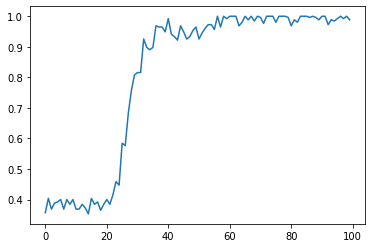

In [64]:
plt.plot(imgs_ex1[:, 99, 90])

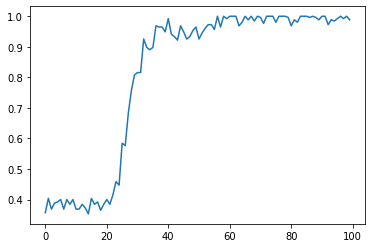

In [65]:
plt.plot(imgs_ex2[:, 99, 90])

# Make features

In [11]:
#cube = imgs[:, 99-5:99+6, 90-5:90+6]

In [13]:
#for ii in range(30):
  #print(feat_sky[ii].shape)

In [66]:
# Make features
# Test Example 1

# Air conditioner

feat_acs_ex1 = []

for ii in range(len(acs_row)):
  trow = acs_row[ii]
  tcol = acs_col[ii]
  feat_acs_ex1.append(imgs_ex1[:, trow-5:trow+6, tcol-5:tcol+6].transpose(1, 2, 0))

feat_acs_ex1 = np.array(feat_acs_ex1)
print(feat_acs_ex1.shape)

# Building
feat_bld_ex1 = []

for ii in range(len(bld_row)):
  trow = bld_row[ii]
  tcol = bld_col[ii]
  feat_bld_ex1.append(imgs_ex1[:, trow-5:trow+6, tcol-5:tcol+6].transpose(1, 2, 0))

feat_bld_ex1 = np.array(feat_bld_ex1)
print(feat_bld_ex1.shape)

# Sky
feat_sky_ex1 = []

for ii in range(len(sky_row)):
  trow = sky_row[ii]
  tcol = sky_col[ii]
  feat_sky_ex1.append(imgs_ex1[:, trow-5:trow+6, tcol-5:tcol+6].transpose(1, 2, 0))

feat_sky_ex1 = np.array(feat_sky_ex1)
print(feat_sky_ex1.shape)

# Window
feat_win_ex1 = []

for ii in range(len(win_row)):
  trow = win_row[ii]
  tcol = win_col[ii]
  feat_win_ex1.append(imgs_ex1[:, trow-5:trow+6, tcol-5:tcol+6].transpose(1, 2, 0))

feat_win_ex1 = np.array(feat_win_ex1)
print(feat_win_ex1.shape)

(30, 11, 11, 100)
(100, 11, 11, 100)
(30, 11, 11, 100)
(30, 11, 11, 100)


In [68]:
# Make features
# Test Example 2

# Air conditioner

feat_acs_ex2 = []

for ii in range(len(acs_row)):
  trow = acs_row[ii]
  tcol = acs_col[ii]
  feat_acs_ex2.append(imgs_ex2[:, trow-5:trow+6, tcol-5:tcol+6].transpose(1, 2, 0))

feat_acs_ex2 = np.array(feat_acs_ex2)
print(feat_acs_ex2.shape)

# Building
feat_bld_ex2 = []

for ii in range(len(bld_row)):
  trow = bld_row[ii]
  tcol = bld_col[ii]
  feat_bld_ex2.append(imgs_ex2[:, trow-5:trow+6, tcol-5:tcol+6].transpose(1, 2, 0))

feat_bld_ex2 = np.array(feat_bld_ex2)
print(feat_bld_ex2.shape)

# Sky
feat_sky_ex2 = []

for ii in range(len(sky_row)):
  trow = sky_row[ii]
  tcol = sky_col[ii]
  feat_sky_ex2.append(imgs_ex2[:, trow-5:trow+6, tcol-5:tcol+6].transpose(1, 2, 0))

feat_sky_ex2 = np.array(feat_sky_ex2)
print(feat_sky_ex2.shape)

# Window
feat_win_ex2 = []

for ii in range(len(win_row)):
  trow = win_row[ii]
  tcol = win_col[ii]
  feat_win_ex2.append(imgs_ex2[:, trow-5:trow+6, tcol-5:tcol+6].transpose(1, 2, 0))

feat_win_ex2 = np.array(feat_win_ex2)
print(feat_win_ex2.shape)

(30, 11, 11, 100)
(100, 11, 11, 100)
(30, 11, 11, 100)
(30, 11, 11, 100)


In [15]:
# -- determine the shape of these images so that we know how to set up the convnet
#feat_acs_sh = feat_acs.shape
#feat_bld_sh = feat_bld.shape
#feat_sky_sh = feat_sky.shape
#feat_win_sh = feat_win.shape
#feat_acs_sh, feat_bld_sh, feat_sky_sh, feat_win_sh

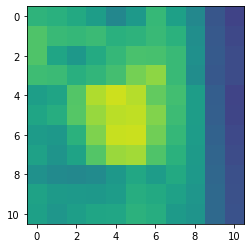

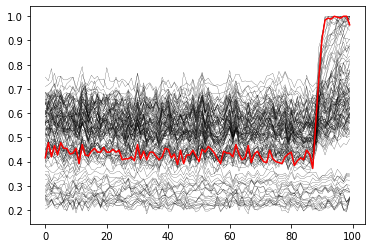

In [71]:
# Plot air conditioner for test example1
ind = 9
plt.imshow(feat_acs_ex1[ind][:, :, 90], clim=[0, 1])
plt.figure()
dum = plt.plot(feat_acs_ex1[ind].reshape(121, 100).T, "k", lw=0.2)
#dum = plt.plot(feat_acs[ind].reshape(121, 1435).T, "k", lw=0.2)
dum = plt.plot(feat_acs_ex1[ind][5, 5], "r")

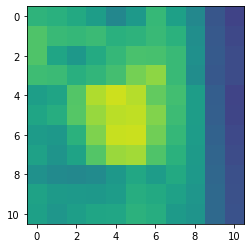

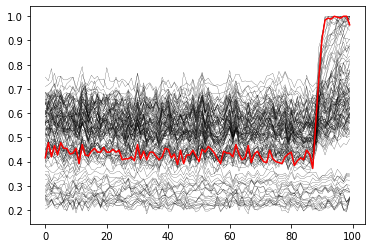

In [72]:
# Plot air conditioner for test example 2
ind = 9
plt.imshow(feat_acs_ex2[ind][:, :, 90], clim=[0, 1])
plt.figure()
dum = plt.plot(feat_acs_ex2[ind].reshape(121, 100).T, "k", lw=0.2)
#dum = plt.plot(feat_acs[ind].reshape(121, 1435).T, "k", lw=0.2)
dum = plt.plot(feat_acs_ex2[ind][5, 5], "r")

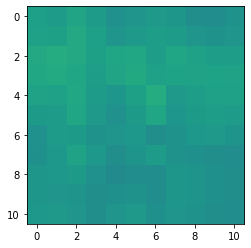

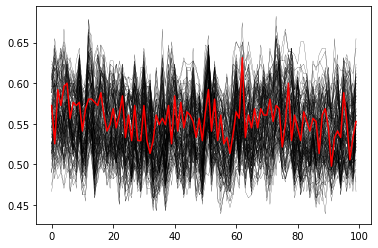

In [80]:
# Plot building
ind = 90
plt.imshow(feat_bld_ex1[ind][:, :, 90], clim=[0, 1])
plt.figure()
dum = plt.plot(feat_bld_ex1[ind].reshape(121, 100).T, "k", lw=0.2)
#dum = plt.plot(feat_bld[ind].reshape(121, 1435).T, "k", lw=0.2)
dum = plt.plot(feat_bld_ex1[ind][5, 5], "r")

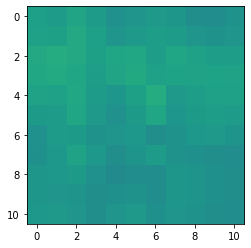

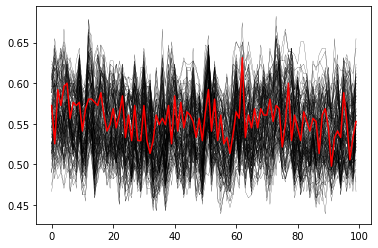

In [81]:
# Plot building
ind = 90
plt.imshow(feat_bld_ex2[ind][:, :, 90], clim=[0, 1])
plt.figure()
dum = plt.plot(feat_bld_ex2[ind].reshape(121, 100).T, "k", lw=0.2)
#dum = plt.plot(feat_bld[ind].reshape(121, 1435).T, "k", lw=0.2)
dum = plt.plot(feat_bld_ex2[ind][5, 5], "r")

In [73]:
# Feature
#feat = np.vstack([feat_acs, feat_bld])
feat_ex1 = np.vstack([feat_acs_ex1, feat_bld_ex1, feat_sky_ex1, feat_win_ex1])
print(feat_ex1.shape)
# standardize the features
#feat = (feat - feat.mean(axis=1, keepdims=True)) / feat.std(axis=1, keepdims=True)

(190, 11, 11, 100)


In [74]:
feat_ex2 = np.vstack([feat_acs_ex2, feat_bld_ex2, feat_sky_ex2, feat_win_ex2])
print(feat_ex2.shape)

(190, 11, 11, 100)


In [99]:
# Stack features
feat = np.vstack([feat_ex1, feat_ex2])
print(feat.shape)

(380, 11, 11, 100)


# Make target

In [19]:
# Target 
# initialize target array
labs_acs = np.zeros(acs.shape[0])
labs_bld = np.zeros(bld.shape[0]) + 1
labs_sky = np.zeros(sky.shape[0]) + 2
labs_win = np.zeros(win.shape[0]) + 3

In [100]:
#targ = np.hstack([labs_acs, labs_bld])
targ_ex = np.hstack([labs_acs, labs_bld, labs_sky, labs_win])
len(targ_ex)

190

In [101]:
targ = np.hstack([labs_acs, labs_bld, labs_sky, labs_win, labs_acs, labs_bld, labs_sky, labs_win])
len(targ)

380

# Check features and target (Prepare fore the model)

In [76]:
from sklearn.model_selection import train_test_split

In [104]:
# -- create a training/testing sample
feat_ex1_tr, feat_ex1_te, targ_ex1_tr, targ_ex1_te = train_test_split(feat_ex1, targ_ex, test_size=0.20, random_state=314)
print(feat_ex1.shape)
print(targ_ex.shape)
print(feat_ex1_tr.shape)
print(targ_ex1_tr.shape)
print(feat_ex1_te.shape)
print(targ_ex1_te.shape)

(190, 11, 11, 100)
(190,)
(152, 11, 11, 100)
(152,)
(38, 11, 11, 100)
(38,)


In [105]:
# -- create a training/testing sample
feat_ex2_tr, feat_ex2_te, targ_ex2_tr, targ_ex2_te = train_test_split(feat_ex2, targ_ex, test_size=0.20, random_state=314)
print(feat_ex2.shape)
print(targ_ex.shape)
print(feat_ex2_tr.shape)
print(targ_ex2_tr.shape)
print(feat_ex2_te.shape)
print(targ_ex2_te.shape)

(190, 11, 11, 100)
(190,)
(152, 11, 11, 100)
(152,)
(38, 11, 11, 100)
(38,)


In [106]:
# -- create a training/testing sample
feat_tr, feat_te, targ_tr, targ_te = train_test_split(feat, targ, test_size=0.20, random_state=314)
print(feat.shape)
print(targ.shape)
print(feat_tr.shape)
print(targ_tr.shape)
print(feat_te.shape)
print(targ_te.shape)

(380, 11, 11, 100)
(380,)
(304, 11, 11, 100)
(304,)
(76, 11, 11, 100)
(76,)


# 3D Convolutional Neural Network (Conv3D)

---



## Set 3D CNN model

In [79]:
import numpy as np
import keras
from keras.layers import Conv3D, Flatten
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution3D, MaxPooling3D
from keras.optimizers import SGD
from keras.utils import np_utils
from keras import backend as K

In [107]:
# Conv3D
conv0  = keras.layers.Conv3D(32, kernel_size=(5, 5, 5), padding="same", activation="relu", input_shape=(11,11,100, 1))
pool0  = keras.layers.MaxPooling3D((2, 2, 2), strides=2)
drop0   = keras.layers.Dropout(0.5)

conv1  = keras.layers.Conv3D(64, kernel_size=(5, 5, 5), padding="same", activation="relu")
pool1  = keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=2)
drop1   = keras.layers.Dropout(0.5)

conv2  = keras.layers.Conv3D(64, kernel_size=(5, 5, 5), padding="same", activation="relu")
pool2  = keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=2)
drop2   = keras.layers.Dropout(0.5)

flat   = keras.layers.Flatten()
fconn  = keras.layers.Dense(1024, activation="relu")
drop3   = keras.layers.Dropout(0.5)

#output = keras.layers.Dense(2, activation="softmax")
output = keras.layers.Dense(4, activation="softmax")

layers = [conv0, pool0, drop0, flat, fconn, drop3, output]

# -- instantiate the model
model = keras.Sequential(layers)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
#model.summary()

## Train/Test set

In [108]:
# reshape 
feat_tr = feat_tr.reshape(feat_tr.shape[0], feat_tr.shape[1], feat_tr.shape[2], 100, 1)
feat_te = feat_te.reshape(feat_te.shape[0], feat_te.shape[1], feat_te.shape[2], 100, 1)

#feat_tr = feat_tr.reshape(feat_tr.shape[0], feat_tr.shape[1], feat_tr.shape[2], 1435, 1)
#feat_te = feat_te.reshape(feat_te.shape[0], feat_te.shape[1], feat_te.shape[2], 1435, 1)

feat_tr.shape[0], feat_tr.shape[1], feat_tr.shape[2], feat_te.shape[0], feat_te.shape[1], feat_te.shape[2]

(304, 11, 11, 76, 11, 11)

In [109]:
# -- fit the training data
#history = model.fit(feat_tr, targ_tr, epochs=100, batch_size=10)
history = model.fit(feat_tr, targ_tr, epochs=10, batch_size=10)

Epoch 1/10
31/31 [==============================] - 0s 9ms/step - loss: 1.0960 - accuracy: 0.6711
Epoch 2/10
31/31 [==============================] - 0s 9ms/step - loss: 0.3238 - accuracy: 0.9079
Epoch 3/10
31/31 [==============================] - 0s 9ms/step - loss: 0.2254 - accuracy: 0.9408
Epoch 4/10
31/31 [==============================] - 0s 9ms/step - loss: 0.1904 - accuracy: 0.9507
Epoch 5/10
31/31 [==============================] - 0s 8ms/step - loss: 0.1976 - accuracy: 0.9441
Epoch 6/10
31/31 [==============================] - 0s 8ms/step - loss: 0.1632 - accuracy: 0.9539
Epoch 7/10
31/31 [==============================] - 0s 8ms/step - loss: 0.1418 - accuracy: 0.9605
Epoch 8/10
31/31 [==============================] - 0s 9ms/step - loss: 0.1749 - accuracy: 0.9507
Epoch 9/10
31/31 [==============================] - 0s 9ms/step - loss: 0.2147 - accuracy: 0.9507
Epoch 10/10
31/31 [==============================] - 0s 9ms/step - loss: 0.2395 - accuracy: 0.9342


In [110]:
loss_tr, acc_tr = model.evaluate(feat_tr, targ_tr)
loss_te, acc_te = model.evaluate(feat_te, targ_te)
print("TRAINING accuracy : {0:.4f}".format(acc_tr))
print("TESTING accuracy  : {0:.4f}".format(acc_te))

3/3 [==============================] - 0s 5ms/step - loss: 0.2436 - accuracy: 0.9211
TRAINING accuracy : 0.8355
TESTING accuracy  : 0.9211


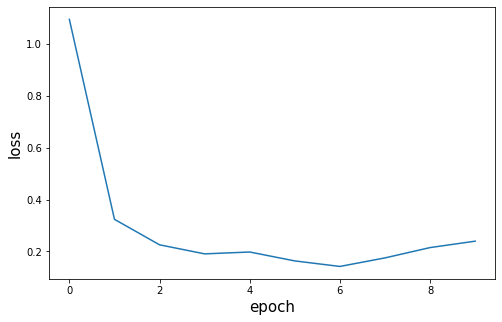

In [111]:
# -- plot the loss function
fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(history.history["loss"])
ax.set_xlabel("epoch", fontsize=15)
ax.set_ylabel("loss", fontsize=15)
fig.show()

In [112]:
learning_rate = 0.001
# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=learning_rate), metrics=['accuracy'])

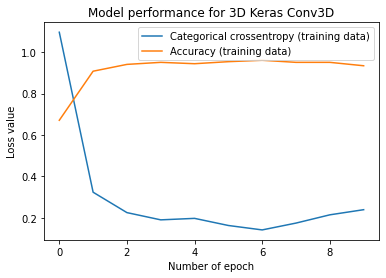

In [113]:
# Generate generalization metrics
#score = model.evaluate(feat_te, targ_te, verbose=0)
#print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Plot history: Categorical crossentropy & Accuracy
plt.plot(history.history['loss'], label='Categorical crossentropy (training data)')
#plt.plot(history.history['val_loss'], label='Categorical crossentropy (validation data)')
plt.plot(history.history['accuracy'], label='Accuracy (training data)')
#plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
plt.title('Model performance for 3D Keras Conv3D')
plt.ylabel('Loss value')
plt.xlabel('Number of epoch')
plt.legend(loc="upper right")
plt.show()

## Predict on all pixels

In [114]:
feat.shape

(380, 11, 11, 100)

In [115]:
imgs.shape

(100, 240, 320)

In [116]:
nrow, ncol, nrow*ncol

(240, 320, 76800)

In [117]:
(imgs.shape[0], nrow * ncol)

(100, 76800)

In [118]:
imgs.reshape(imgs.shape[0], nrow * ncol).T.shape

(76800, 100)

In [119]:
# -- convert images into all features
# feat_all = imgs.reshape(Nt, Nr * Nc).T, which is [Npix, Nt]
feat_1 = imgs.reshape(imgs.shape[0], nrow * ncol).T
feat_1.shape
# Need to come out as 71350

(76800, 100)

In [120]:
#imgs[:, 112-5:112+6, 43-5:43+6].transpose(1,2,0).reshape(11,11,300,1)

In [121]:
# all_pix = np.zeros([(nrow - 10) * (ncol - 10), 11, 11, 100, 1])
 #cnt = 0
 #for ii in range(5, nrow - 5): 
     #for jj in range(5, ncol - 5): 
         #all_pix[cnt] = imgs[:, ii-5:ii+5, jj-5:jj+5].tranpose(1, 2, 0).reshape(11, 11, 100, 1)
         #cnt += 1
         #all_pix.append(model.predict(all_pix[cnt])[0].argmax())

#model.predict(all_pix)[0]
#model.predict(all_pix)[0].argmax(.....)

In [122]:
#imgs[:, ii-5:ii+6, jj-5:jj+6].transpose(1,2,0).reshape(1,11,11,700,1)
#%timeit model.predict(x)[0].argmax()

In [123]:
pred_all = []

for ii in np.arange(5,nrow-5):
  print(ii)
  for jj in np.arange(5,ncol-5):
    x = imgs[:, ii-5:ii+6, jj-5:jj+6].transpose(1,2,0).reshape(1,11,11,100,1)
    pred_all.append(model.predict(x)[0].argmax())

# The total number is 234

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234


In [137]:
#pred_all 

In [125]:
pred_all = np.array(pred_all)

In [126]:
pred_all.shape

(71300,)

In [127]:
# model.predict(feat_all), which is [Np] -> giving result of labels (0,1,2,3)

#pred_all = model.predict(feat_all)
#pred_all = model.predict(feat_1)

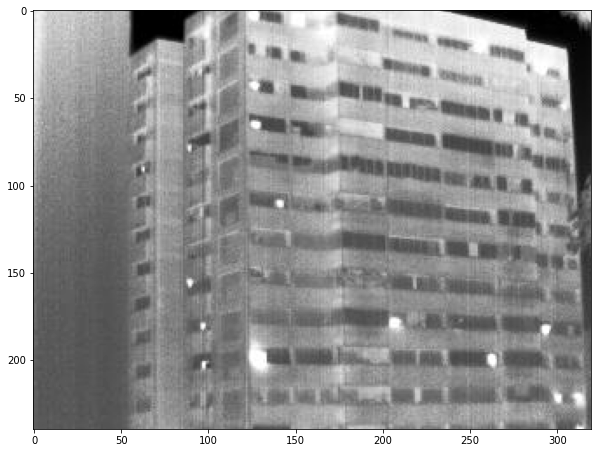

In [135]:
plt.figure(figsize=(10, 10))
plt.imshow(imgs[0], cmap= 'gray')

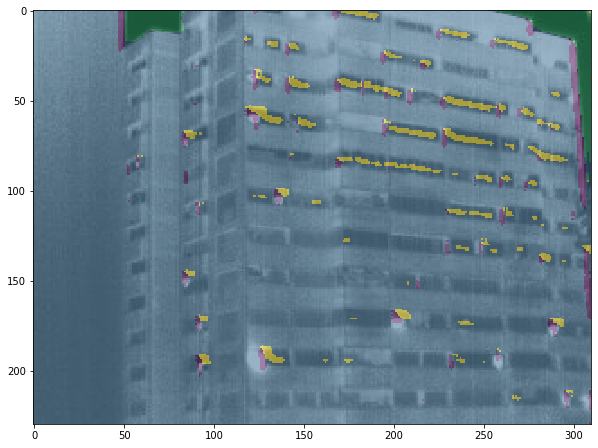

In [136]:
# -- show the predictions
pimg = pred_all.reshape(nrow-5*2, ncol-5*2)


plt.figure(figsize=(10, 10))

plt.imshow(imgs[0, 5:nrow-5, 5:ncol-5], interpolation="nearest", cmap="gist_gray")
plt.imshow(pimg, interpolation="nearest", alpha=0.5)
plt.show()

(50.0, 0.0)

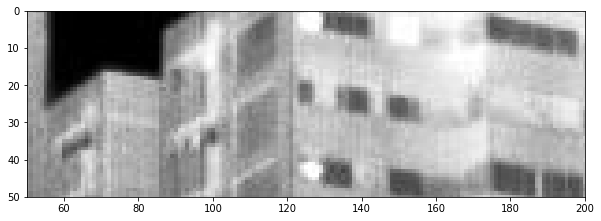

In [130]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(imgs[0], cmap= 'gray')
ax.set_xlim(50, 200)
ax.set_ylim(50, 0)

(50.0, 0.0)

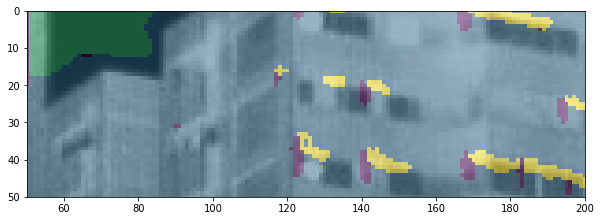

In [131]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(imgs[0, 5:nrow-5, 5:ncol-5], interpolation="nearest", cmap="gist_gray")
ax.imshow(imgs[0], cmap= 'gray')
ax.imshow(pimg, interpolation="nearest", alpha=0.5)
ax.set_xlim(50, 200)
ax.set_ylim(50, 0)

# Model evaluation

In [132]:
from sklearn.metrics import confusion_matrix

# -- predict the training data
pred_te = model.predict(feat_te)

# -- set a threshold for detection
thresh = 0.99

# -- determine the confusion matrix
conf = confusion_matrix(targ_te, pred_te[:, 1] > thresh)

print("confusion matrix : \n{0}".format(conf))

confusion matrix : 
[[10  0  0  0]
 [40  4  0  0]
 [12  0  0  0]
 [10  0  0  0]]


In [133]:
from sklearn.metrics import roc_curve

# -- generate ROC curve
#pred_te = model.predict(feat_te)
#roc = roc_curve(targ_te, pred_te[:, 1])

# -- plot it
#fig, ax = plt.subplots(figsize=(8, 5))
#ax.plot(roc[0], roc[1], color="darkred", lw=2)
#ax.set_xlabel("FPR")
#ax.set_ylabel("TPR")
#fig.show()

In [134]:
from sklearn.metrics import precision_recall_fscore_support

# -- calculate precision and recall
pred_img = 1 * (pred_te[:, 0] < pred_te[:, 1])
prec, recall, fbeta, support = precision_recall_fscore_support(targ_te, pred_img)

print("precision : {0:.3f}".format(prec[1]))
print("recall    : {0:.3f}".format(recall[1]))
print("support   : {0}".format(support))

precision : 0.667
recall    : 1.000
support   : [10 44 12 10]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
